In [6]:
import os, sys
sys.path.append(os.path.abspath('../'))

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# test_dir = '/Volumes/LIBERZONTAU/grisha_laskin_outlet/'

In [8]:
# %load ./tests/test0.py
#!/usr/bin/python

from vecPy import loadVec
from vecPy import vecPlot
from vecPy.vecPy import vec, vecList

In [5]:
# test_dir = "tests/data"
lst = loadVec.read_directory(test_dir)
lst.sort()

OSError: [Errno 2] No such file or directory: '/Volumes/LIBERZONTAU/grisha_laskin_outlet/'

In [32]:
dt = loadVec.get_dt(lst[0],test_dir)
resolution = 1.3e-3/67. #[m/px]


vec_array = vecList()

for f in lst[:5]:
    # print f
    data = loadVec.get_data(f,test_dir)
    x,y,u,v,chc = loadVec.vecToMatrix(data)
    d = vec(x,y,u,v,chc,dt,lUnits = 'm',tUnits = 's')
    d.scale(resolution)
    d.rotate(-90)#
    vec_array.append(d)
    


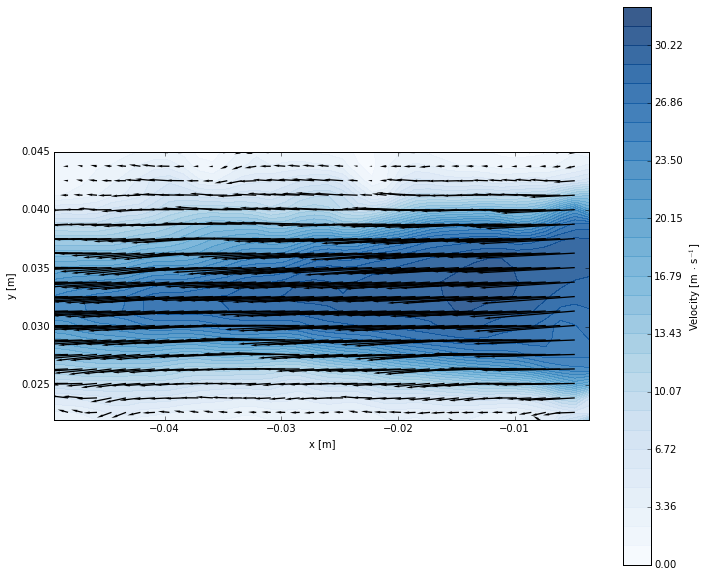

In [33]:
av = vec_array.average()
figure(figsize=(12,10))
vecPlot.genQuiver(av, arrScale = 5.0, threshold = None, nthArr = 1, contourLevels = None)

ylim((0.022, 0.045))
axes().set_aspect('equal')


(0.022, 0.045)

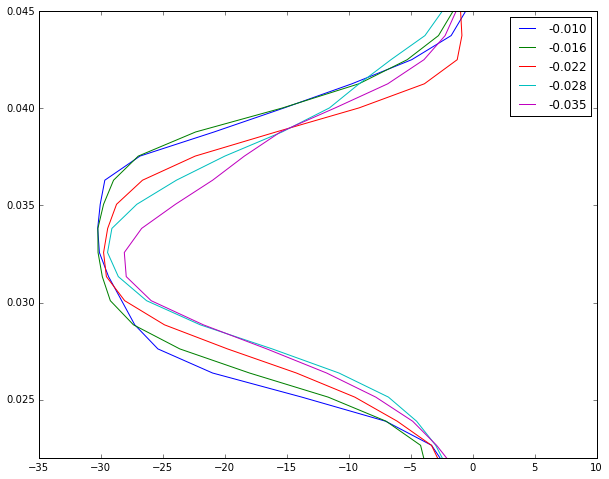

In [34]:
# plot velocity profiles at various x locations
figure(figsize=(10,8))
for i in arange(5,30,5):
    plot(av.u[i,:],av.y[15,:],label="{:4.3f}".format(av.x[i,0]))
legend()
ylim((0.022, 0.045))

(0.022, 0.045)

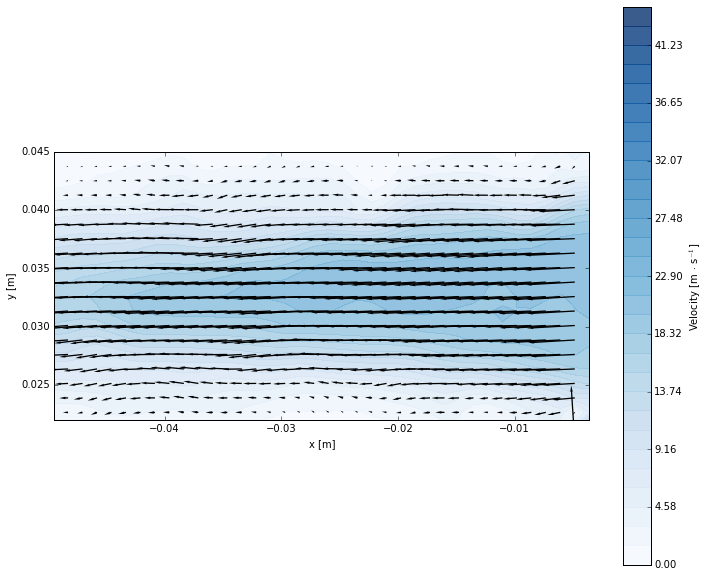

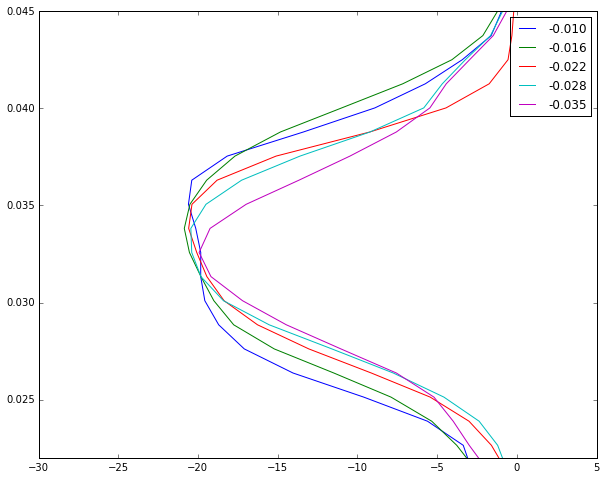

In [35]:
vec_array = vecList()

for f in lst[5:]:
    # print f
    data = loadVec.get_data(f,test_dir)
    x,y,u,v,chc = loadVec.vecToMatrix(data)
    d = vec(x,y,u,v,chc,dt,lUnits = 'm',tUnits = 's')
    d.scale(resolution)
    d.rotate(-90)#
    vec_array.append(d)
    
av = vec_array.average()
figure(figsize=(12,10))
vecPlot.genQuiver(av, arrScale = 5.0, threshold = None, nthArr = 1, contourLevels = None)
ylim((0.022, 0.045))
axes().set_aspect('equal')



# plot velocity profiles at various x locations
figure(figsize=(10,8))
for i in arange(5,30,5):
    plot(av.u[i,:],av.y[15,:],label="{:4.3f}".format(av.x[i,0]))
legend()
ylim((0.022, 0.045))

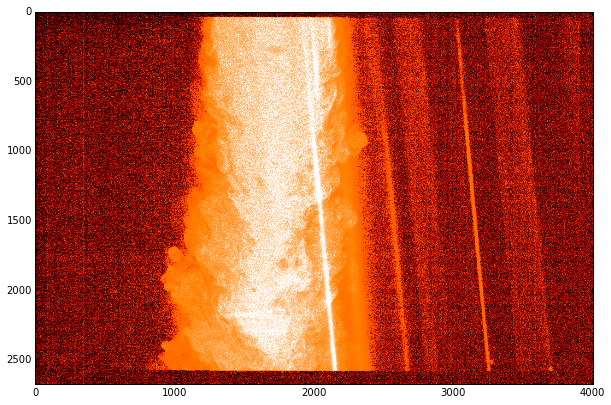

NameError: name 'av' is not defined

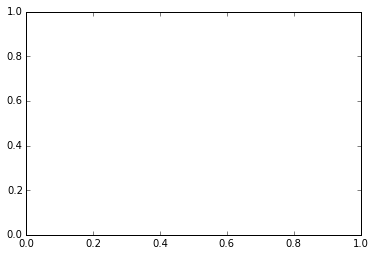

In [9]:
from skimage import io, exposure
import matplotlib.pyplot as plt
%matplotlib inline
 
image = io.imread('/Users/alex/Downloads/camera3_LLK300006.T000.D000.P000.H049.LA.TIF', plugin='tifffile')
image_eq = exposure.equalize_hist(image)
 
plt.figure(figsize=(10,8))
plt.imshow(image_eq, cmap='gist_heat')
plt.show()
plt.hold(True)

vecPlot.genQuiver(av.rotate(90), arrScale = 5.0, threshold = None, nthArr = 1, contourLevels = None)